<a href="https://colab.research.google.com/github/JakubPyt/Demographic_Data_Analyzer/blob/main/Demographic_Data_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demographic Data Analyzer

This project was created as part of the course on the free Code Camp website:

https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/demographic-data-analyzer 

On this project I had to analyze demographic data using pandas. I got a dataset of demographic data, that was extracted from the 1994 Census database.

But also I challenged myself to visualise answers. 

In [223]:
# Import of needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import the data 
url = 'https://raw.githubusercontent.com/JakubPyt/Demographic_Data_Analyzer/main/adult.data.csv'
data = pd.read_csv(url, sep=";")

# Display first five rows of dataset
data.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Changing the font size

I changed the outputs font size for clearer analysis.

In [224]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '16px'
      break
    }
  }
  '''))

get_ipython().events.register('pre_run_cell', increase_font)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## How many of each race are represented in this dataset? 

In [225]:
# Simply value_counts for column 'race'
race_count = data.race.value_counts()
print(race_count) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

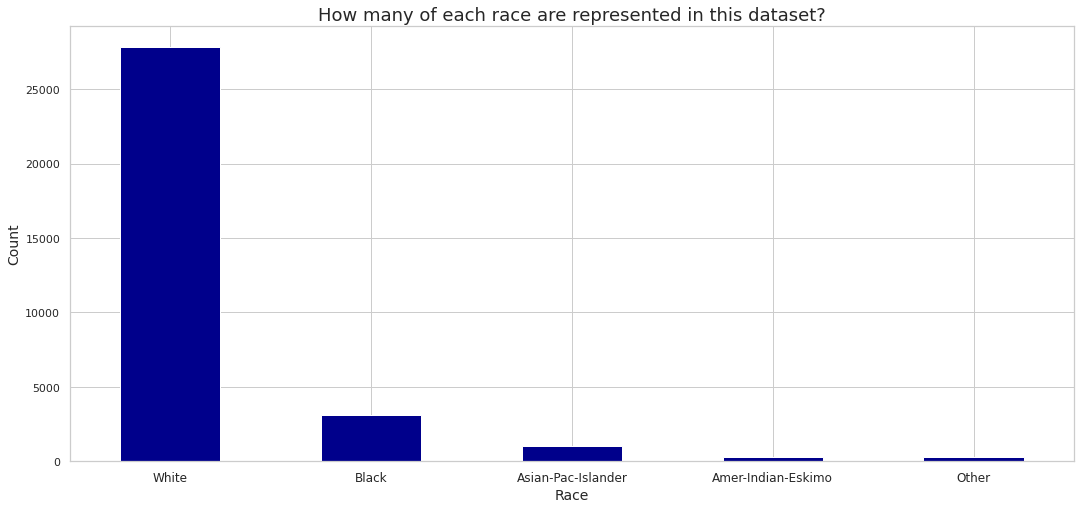

In [226]:
# Matplotlib

# Size of figure
plt.figure(figsize=(18,8))

# Create plot
data['race'].value_counts().plot(
    kind='bar',
    color='darkblue'
)

# Chart settings
plt.grid(True)
plt.title('How many of each race are represented in this dataset?', fontsize=18)
plt.xticks(rotation = 0, fontsize=12)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

## What is the average age of men?

In [227]:
# First I chose only rows with sex "Male"
# Next I caluculated mean of column age
# And I rounded it to second place
average_age_men = round(data[data.sex == 'Male'].age.mean(),2)

print("Average age of men:", average_age_men)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Average age of men: 39.43


In [228]:
# Plotly 

fig = px.box(
    data[data.sex == 'Male'],
    x='age',
    orientation='h', 
    height=300,
    title="Age analysis of men", 
)

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## What is the percentage of people who have a Bachelor's degree?

In [229]:
# First I did value_counts(with normalize) for column 'education'
# Then I chose only value for 'Bachelors'
# Result rounded to second place
percentage_bachelors = round((data.education.value_counts(normalize=True).Bachelors)*100,2) 

print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Percentage with Bachelors degrees: 16.45%


In [230]:
# Plotly

fig = px.pie(
    data,
    values=data[['education']].value_counts(),
    names=data['education'].value_counts().index,
    title="What is the percentage of people who have a Bachelor's degree?"
)

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Education and salary

### What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [232]:
# First, I create mask, which extract rows with 'Bachelors', 'Masters', ans 'Doctorate'
higher_education = ( (data['education'] == 'Doctorate')
                    | (data['education'] == 'Bachelors') 
                    | (data['education'] == 'Masters'))

# I used this mask and then I did value_counts(with normalize)
# Next I chose only row with index '>50K' and rounded its value
higher_education_rich = round((
            data[higher_education].salary.value_counts(normalize=True)['>50K']
                )*100 ,2)

print(f"Percentage of people with higher education that earn >50K: {higher_education_rich}%")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Percentage of people with higher education that earn >50K: 46.54%


### What percentage of people without advanced education make more than 50K?

In [233]:
# Lower education is just not higher education
lower_education = ~higher_education 

# The same as for higher education
lower_education_rich = round((
            data[lower_education].salary.value_counts(normalize=True)['>50K']
                )*100 ,2)

print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Percentage without higher education that earn >50K: 17.37%


### Visualisation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

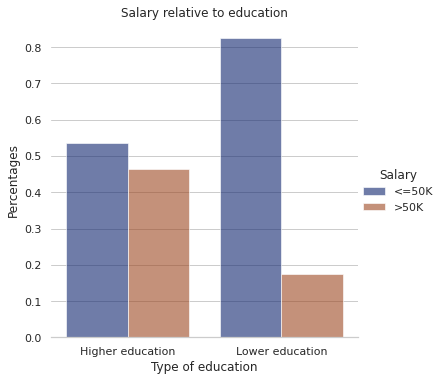

In [234]:
# Seaborn

# For this visualisation I had to rebuild dataset to other form

# First let's do a copy
data_visualisation = data.copy()

# In new dataset we add column 'type-education' 
# with values "Higher education" and "Lower education"
# based on a column 'education'
data_visualisation['type-education'] = np.where(
    ((data_visualisation['education'] == "Doctorate") 
    | (data_visualisation['education'] == "Bachelors") 
    | (data_visualisation['education'] == "Masters")),
    "Higher education",
    "Lower education"
)

# Abracadabra
data_visualisation = (data_visualisation
    # We group dataset by column 'type-education'
    .groupby('type-education')['salary']
    # At the same time, we count values with normalize 
    # In column 'salary', for each group
    .value_counts(normalize=True)
    # Now we have small grouped dataset with values from value_counts
    # But now it will be difficult to visualize our dataset
    # So we unsack column salary into two columns
    .unstack()
    # And then back to form with one column salary
    # But now, values from value_counts is other column
    .melt(ignore_index=False)
    # And now we can reset index to have columns 
    # With salary and type education
    # Insted of Multiindex with them
    .reset_index())

# Finally we can create chart
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=data_visualisation,
    x='type-education',
    y='value',
    hue='salary',
    kind='bar',
    palette="dark",
    alpha=.6,
)

g.despine(left=True)
g.set(title='Salary relative to education')
g.set_axis_labels("Type of education", "Percentages")
g.legend.set_title("Salary")

plt.show()

## Payout percentage distribution of people working the minimum number of hours

### What is the minimum number of hours a person works per week (hours-per-week feature)?

In [235]:
# Simply minimum value from column 'hours-per-week'
min_work_hours = data['hours-per-week'].min()

print(f"Min work time: {min_work_hours} hours/week")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Min work time: 1 hours/week


### What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [236]:
# First, I extract rows with the minimum number of hours  
num_min_workers = data[data['hours-per-week'] == min_work_hours]

# value_counts(Normalize=True) returns percentage of people who have >50K salary from above data 
# I choose only value from row with '>50K' and round it to second place
rich_percentage = round((num_min_workers.salary.value_counts(normalize=True)['>50K'])*100,2)

print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Percentage of rich among those who work fewest hours: 10.0%


### Visualisation

In [216]:
# Plotly

# I used variables from previous cells to extract dataset
# only with people who works minimum number of hours
# and next I count values in column 'salary' 
min_workers = round((num_min_workers.salary.value_counts(normalize=True))*100,2)

# Now I can create the plot
fig = px.bar(
    min_workers, 
    x=min_workers.values,
    color= min_workers.index,
    title="Payout percentage distribution of people working the minimum number of hours", 
    orientation='h', 
    height=325
)

fig.update_yaxes(domain=[0, 0.5])
fig.update_xaxes(title='Percentages')

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Countries and their percentage of the population earning >50K

### What country has the highest percentage of people that earn >50K?

In [237]:
highest_earning_country = (data
    # Grouping rows by countries
    .groupby('native-country')['salary']
    # For each country calculate their percentage of people who earn >50K   
    .value_counts(normalize=True)[:,'>50K']
    # Sort values from the biggest
    .sort_values(ascending=False)
    # Return name of country which is first
    .index[0])

print("Country with highest percentage of rich:", highest_earning_country)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Country with highest percentage of rich: Iran


### What is the percentage of rich people in above country?

In [238]:
# The same as above
# But return value of that country
# Rounded to second place
highest_earning_country_percentage = (round((data
    .groupby('native-country')['salary']
    .value_counts(normalize=True)[:,'>50K']
    .sort_values(ascending=False)[0])*100,2))

print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Highest percentage of rich people in country: 41.86%


### Visualisation

In [239]:
# Plotly

# First create dataset 
# The same as above but returns all countries
data_visualisation = (round(data
    .groupby('native-country')['salary']
    .value_counts(normalize=True)[:,'>50K'] * 100,2))

fig = px.scatter_geo(
    data_visualisation, # Source of data
    locations=data_visualisation.index,  # Locations which are interpreted
    size=data_visualisation.values,  # Size of circle
    hover_name=data_visualisation.index,  # Name displayed when hover circle
    locationmode='country names', # Setting to interpreted location
    color=data_visualisation.index, # Each country have self color
    projection="natural earth",  # Type of map
    title='Countries and their percentage of the population earning >50K',
    labels={"color":'Country', 'size':'Percentage'}
)

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Identify the most popular occupation for those who earn >50K in India.

In [240]:
# Create a mask to choose only rows about people from India which earns >50K
mask = (data['salary'] == '>50K') & (data['native-country'] == 'India')

# Use mask to dataset
top_IN_occupation = (data[mask]['occupation']
    # Count values in column 'occupation'
    .value_counts()[:1]
    # Return occupation with highest number
    .index[0])

print("Top occupations in India:", top_IN_occupation)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Top occupations in India: Prof-specialty


In [241]:
# Plotly

# I used mask from previous cell to create dataset
# Dataset includes occupations and their number
data_visualisation = (data[mask]
    .groupby(['occupation'], as_index=False)['age']
    .count()
    .rename({'age': 'count'}, axis=1))


# Create plot
fig = px.bar(
    data_visualisation, 
    y="occupation", 
    x="count", 
    title="Professions of rich people in India", 
    orientation='h', 
    height=400
)

fig.update_yaxes(title='Occupation')
fig.update_xaxes(title='Count')

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>